In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ast
from itertools import product

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [256]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Training dataset.csv")


In [257]:
pd.options.display.max_columns = None
df.head(20)

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,2023-09-05,schneider-electric,5.85,479,31,0,2,33,7,Post,Document,https://www.linkedin.com/feed/update/urn:li:ac...,Join us to Understand the basics of harmonics ...,https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
1,2023-09-01,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"When challenges arise, Schneider Electric Exch...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x420,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Building,1,Building,center,57.181154,NaN,NaN,0.000000,Life Is On Schneider|Electric|controlsee,37,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,0.714286,NaN,NaN,0.000000,0,small,0.000000,NaN,NaN,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2,2023-09-04,schneider-electric,2.32,785,55,1,16,72,11,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 4 PM HKT...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,Informative,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
3,2023-09-04,schneider-electric,3.94,658,54,1,5,60,8,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Join our webinar on September 19th at 5 PM CET...,https://www.linkedin.com/company/schneider-ele...,NaN,https://www.linkedin.com/video/event/urn:li:ug...,2023-09-13 9:46:04,100x100,NaN,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
4,2023-09-04,schneider-electric,3.89,2568,168,1,5,174,25,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,More than 80% of partners have made investment...,https://www.linkedin.com/company/schneider-ele...,https://dms.licdn.com/playlist/vid/D4D10AQGDxy...,NaN,2023-09-13 9:46:04,1200x630,https://rocketium.com/images/cran/prod/assets/...,2,Joy,top-center,4.381481,"Glasses, Person, Person, Tie, Person, Glasses",6,Person,center,54.487621,Person,center,30.206522,Life Is On Schneiderte,21,darkslategray,NaN,"Schneider Electric, Schneider Electric",Schneider Electric,bottom-left,0.761905,Schneider Electric,bottom-left,0.414683,3,large,125.009998,NaN,NaN,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40
5,2023-09-08,schneider-electric,589.48,84316,136,0,10,146,14,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"Today we are making in India, for #India and f...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x418,https://rocketium.com/images/cran/prod/assets/...,1,Joy,center-right,10.625000,"Person, Person, Ball",3,Person,bottom-right,18.644909,Person,center-right,20.719155,

In [258]:
#dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

In [260]:
df.shape

(1054, 57)

In [259]:

df.columns

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area percentage %', 'secondary object',
       'secondary object position', 'secondary object area percentage %',
       'text', 'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 name',
       'logo 2 position', 'logo 2 area percentage %', 'number of persons',
       'person area %', 'person area', 'style', 'tone', 'voice', 'sentiment',
       'text area %', 'empty space %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length'],

In [261]:

df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
spend,1054.000000,213.192998,1253.414372,0.000000,6.615000,23.645000,87.315000,23039.110000
impressions,1054.000000,15075.879507,67763.338279,0.000000,803.750000,2577.000000,7612.250000,961453.000000
likecount,1054.000000,197.481973,343.418407,0.000000,33.000000,98.500000,220.000000,6130.000000
commentcount,1054.000000,2.911765,8.764124,0.000000,0.000000,0.000000,2.000000,111.000000
repostcount,1054.000000,11.707780,19.993921,0.000000,1.000000,5.000000,14.000000,193.000000
total engagements,1054.000000,212.101518,360.599591,0.000000,34.250000,110.000000,241.000000,6291.000000
conversion,1054.000000,34.914611,61.291577,0.000000,5.000000,13.500000,39.750000,589.000000
number of faces,1054.000000,0.777989,1.899180,0.000000,0.000000,0.000000,1.000000,10.000000
face area percentage %,1054.000000,0.644928,1.900660,0.000000,0.000000,0.000000,0.000000,26.340476
number of objects,1054.000000,1.817837,2.688484,0.000000,0.000000,1.000000,3.000000,10.000000


In [262]:
df.tail()

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
1049,2023-08-04,rockwell-automation,0.89,536,34,1,1,36,1,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,What happens when a U.S. marine transporter ga...,https://www.linkedin.com/company/rockwell-auto...,https://dms.licdn.com/playlist/vid/D5605AQGGrW...,NaN,2023-09-21 8:39:25,100x100,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Offerings,English,0,0,0,NaN
1050,2023-08-08,rockwell-automation,1.88,154,12,0,0,12,3,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"[로크웰 오토메이션, 포스코HY클린메탈 이차전지 리사이클링 공장 분산제어시스템(D...",https://www.linkedin.com/company/rockwell-auto...,NaN,NaN,2023-09-21 8:39:25,800x450,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.0,"Building, Building, Building",3,Building,center,0.0,Building,center-left,0.0,TELE|MI|MAE|-|ரா|FRER|P|DRD|JANE,23,lightsteelblue,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0,small,0.000000,NaN,NaN,NaN,NaN,1.15,> 40%,Offerings,Korean,0,0,2 to 4,20 to 40
1051,2023-08-04,rockwell-automation,713.23,61614,622,2,80,704,105,Post,Video (LinkedIn Source),https://www.linkedin.com/feed/update/urn:li:ac...,Changing project requirements is disruptive an...,https://www.linkedin.com/company/rockwell-auto...,https://dms.licdn.com/playlist/vid/D5605AQFABd...,NaN,2023-09-21 8:10:42,100x100,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Offerings,English,0,0,0,NaN
1052,2023-08-08,rockwell-automation,15.41,1000,32,0,1,33,2,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,Tune in to this episode of The Journal’s Podca...,https://www.linkedin.com/company/rockwell-auto...,NaN,NaN,2023-09-21 8:39:25,800x533,https://rocketium.com/images/cran/prod/assets/...,2,Joy,center-left,0.0,"Hat, Helmet, Person, Person, Glasses, Person, ...",8,Person,center-left,0.0,Person,center-left,0.0,NaN,0,silver,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,4,large,148.354582,NaN,Informative,NaN,Positive,0.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,NaN
1053,2023-08-18,rockwell-automation,32.46,1743,64,0,6,70,18,Post,Article,https://www.linkedin.com/feed/update/urn:li:ac...,We are excited to join forces with Technology ...,https://www.linkedin.com/company/rockwell-auto...,NaN,https://rok.auto/45fchpF,2023-09-21 8:39:25,100x100,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,0.000000,NaN,NaN,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN


In [263]:
df['spend'].value_counts()

0.25      4
2.68      3
2.64      3
5.54      3
15.14     3
         ..
135.00    1
52.74     1
23.34     1
145.66    1
32.46     1
Name: spend, Length: 978, dtype: int64

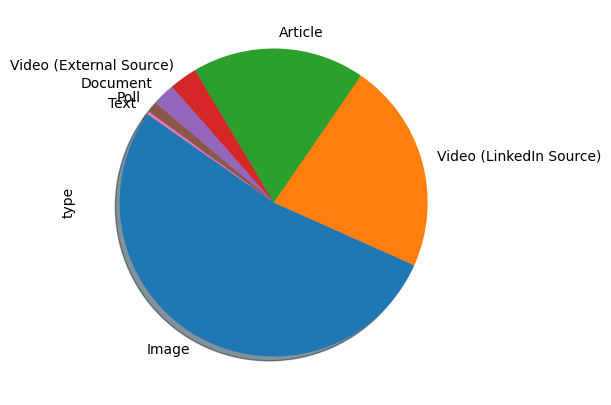

In [264]:
df['type'].value_counts().plot.pie(subplots=True, shadow = True, figsize=(5, 5), startangle=145);

In [265]:
df[['type','likecount']].groupby('type').agg({'likecount':'mean'}).round(2)

,likecount
type,
Article,277.34
Document,257.28
Image,153.67
Poll,60.58
Text,197.67
Video (External Source),124.68
Video (LinkedIn Source),247.45


from matplotlib import pyplot as plt
_df_0['likecount'].plot(kind='hist', bins=20, title='likecount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['likecount'].plot(kind='line', figsize=(8, 4), title='likecount')
plt.gca().spines[['top', 'right']].set_visible(False)

In [266]:
df[['type','impressions']].groupby('type').agg({'impressions':'mean'}).round(2)


,impressions
type,
Article,18574.02
Document,37858.68
Image,13032.35
Poll,2044.67
Text,27477.67
Video (External Source),6967.06
Video (LinkedIn Source),16256.82


from matplotlib import pyplot as plt
_df_2['impressions'].plot(kind='hist', bins=20, title='impressions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['impressions'].plot(kind='line', figsize=(8, 4), title='impressions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [267]:
df[['type','total engagements']].groupby('type').agg({'total engagements':'mean'}).round(2)

,total engagements
type,
Article,293.95
Document,273.16
Image,164.59
Poll,66.75
Text,249.33
Video (External Source),133.32
Video (LinkedIn Source),269.93


from matplotlib import pyplot as plt
_df_4['total engagements'].plot(kind='hist', bins=20, title='total engagements')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['total engagements'].plot(kind='line', figsize=(8, 4), title='total engagements')
plt.gca().spines[['top', 'right']].set_visible(False)

In [268]:
df[['type','spend']].groupby('type').agg({'spend':'mean'}).round(2)

,spend
type,
Article,226.82
Document,475.18
Image,211.98
Poll,26.75
Text,51.45
Video (External Source),87.13
Video (LinkedIn Source),205.29


from matplotlib import pyplot as plt
_df_6['spend'].plot(kind='hist', bins=20, title='spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['spend'].plot(kind='line', figsize=(8, 4), title='spend')
plt.gca().spines[['top', 'right']].set_visible(False)

In [269]:
df[['type','commentcount']].groupby('type').agg({'commentcount':'mean'}).round(2)

,commentcount
type,
Article,3.49
Document,3.20
Image,1.85
Poll,3.92
Text,11.67
Video (External Source),1.29
Video (LinkedIn Source),5.02


from matplotlib import pyplot as plt
_df_8['commentcount'].plot(kind='hist', bins=20, title='commentcount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['commentcount'].plot(kind='line', figsize=(8, 4), title='commentcount')
plt.gca().spines[['top', 'right']].set_visible(False)

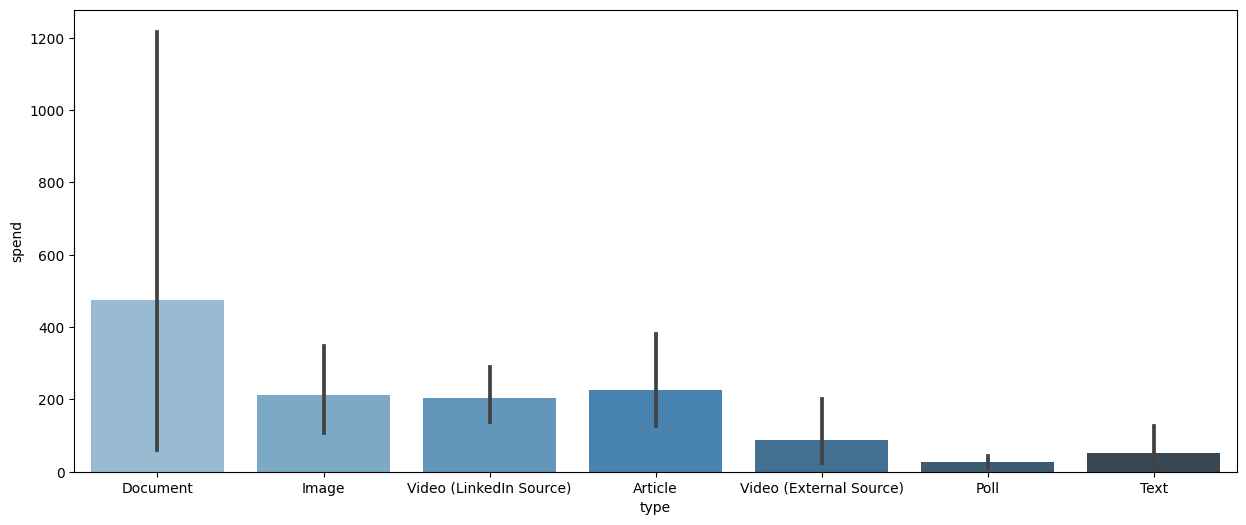

In [270]:
plt.figure(figsize=(15, 6))


sns.barplot(x=df['type'], y=df['spend'], data=df, palette="Blues_d")


plt.show()

In [271]:
def grab_col_types(dataframe):
  """
  Returns the type of variables in the dataset
  """
  # to find obvious categorical variables
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

  # to find numerical but categorical variables
  num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
  cat_cols = cat_cols + num_but_cat

  # to find categorical but cardinal variables
  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f'Total Variables: {len(df.columns)}\n'
        f'Categorical columns: {len(cat_cols)}\n'
        f'Numerical columns: {len(num_cols)}\n'
        f'Categorical but cardinal columns: {len(cat_but_car)}\n'
        f'Numerical but categorical columns: {len(num_but_cat)}')

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [272]:

cat_cols, num_cols, cat_but_car_cols, num_but_cat = grab_col_types(df)

Total Variables: 57
Categorical columns: 23
Numerical columns: 18
Categorical but cardinal columns: 16
Numerical but categorical columns: 0


In [273]:

cat_but_car_cols


['date',
 'posturl',
 'postcontent',
 'videourl',
 'sharedposturl',
 'created_at',
 'size',
 'url',
 'objects',
 'primary object',
 'secondary object',
 'text',
 'dominant colour',
 'cta',
 'logos',
 'logo 1 name']

In [274]:

num_but_cat

[]

In [275]:
cat_cols

['company name',
 'action',
 'type',
 'profileurl',
 'face emotion',
 'face position',
 'primary object position',
 'secondary object position',
 'logo 1 position',
 'logo 2 name',
 'logo 2 position',
 'person area %',
 'style',
 'tone',
 'voice',
 'sentiment',
 'empty space %',
 'topic',
 'language',
 '# faces',
 '# persons',
 '# objects',
 '# text length']

In [276]:
num_cols

['spend',
 'impressions',
 'likecount',
 'commentcount',
 'repostcount',
 'total engagements',
 'conversion',
 'number of faces',
 'face area percentage %',
 'number of objects',
 'primary object area percentage %',
 'secondary object area percentage %',
 'text length',
 'logo 1 area percentage %',
 'logo 2 area percentage %',
 'number of persons',
 'person area',
 'text area %']

In [277]:
def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.15, 0.35, 0.50, 0.65, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count     1054.000000
mean       213.192998
std       1253.414372
min          0.000000
5%           0.886500
15%          2.737500
35%         11.531000
50%         23.645000
65%         55.331500
80%        116.890000
90%        287.568000
95%        631.904000
99%       2999.003100
max      23039.110000
Name: spend, dtype: float64


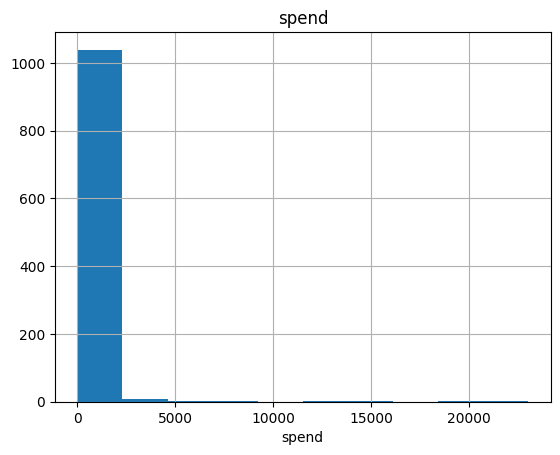

count      1054.000000
mean      15075.879507
std       67763.338279
min           0.000000
5%          133.000000
15%         453.850000
35%        1348.150000
50%        2577.000000
65%        4521.400000
80%       10787.200000
90%       24559.100000
95%       45700.850000
99%      248242.250000
max      961453.000000
Name: impressions, dtype: float64


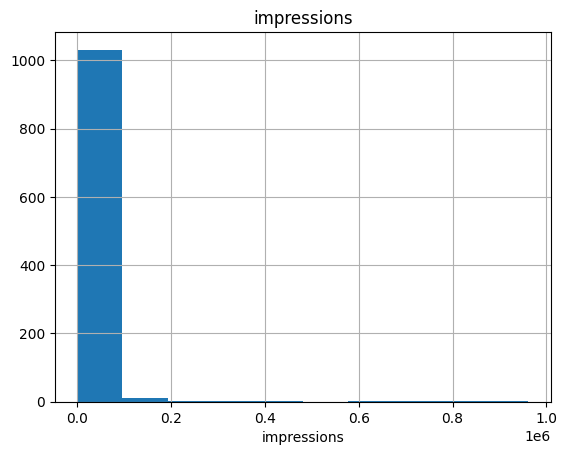

count    1054.000000
mean      197.481973
std       343.418407
min         0.000000
5%          5.000000
15%        21.000000
35%        48.000000
50%        98.500000
65%       165.000000
80%       263.000000
90%       456.000000
95%       722.800000
99%      1725.100000
max      6130.000000
Name: likecount, dtype: float64


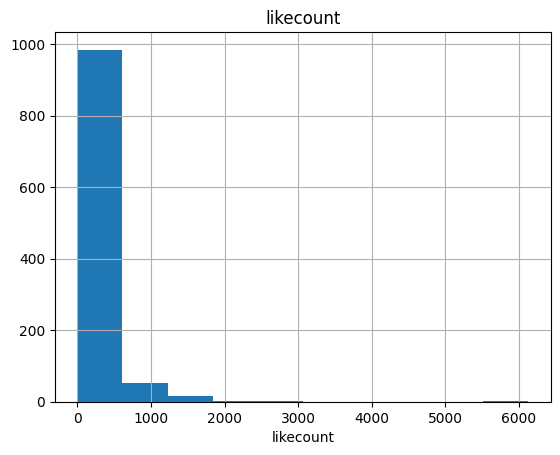

count    1054.000000
mean        2.911765
std         8.764124
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         1.000000
80%         3.000000
90%         7.000000
95%        12.350000
99%        48.000000
max       111.000000
Name: commentcount, dtype: float64


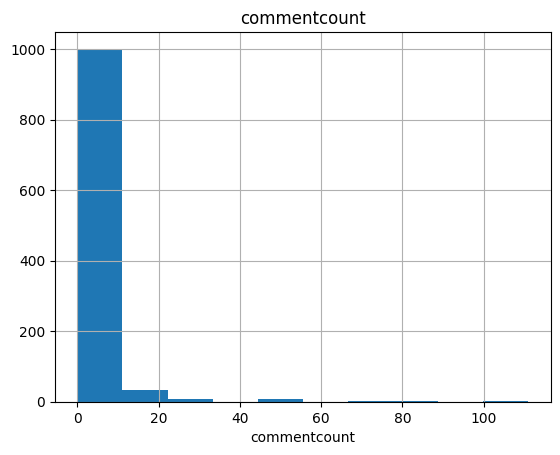

count    1054.000000
mean       11.707780
std        19.993921
min         0.000000
5%          0.000000
15%         1.000000
35%         2.000000
50%         5.000000
65%        10.000000
80%        17.000000
90%        27.700000
95%        44.000000
99%        95.000000
max       193.000000
Name: repostcount, dtype: float64


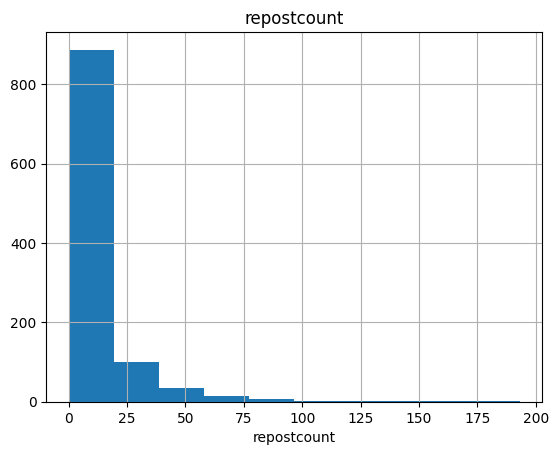

count    1054.000000
mean      212.101518
std       360.599591
min         0.000000
5%          6.000000
15%        23.000000
35%        52.000000
50%       110.000000
65%       177.900000
80%       287.400000
90%       499.000000
95%       750.100000
99%      1796.230000
max      6291.000000
Name: total engagements, dtype: float64


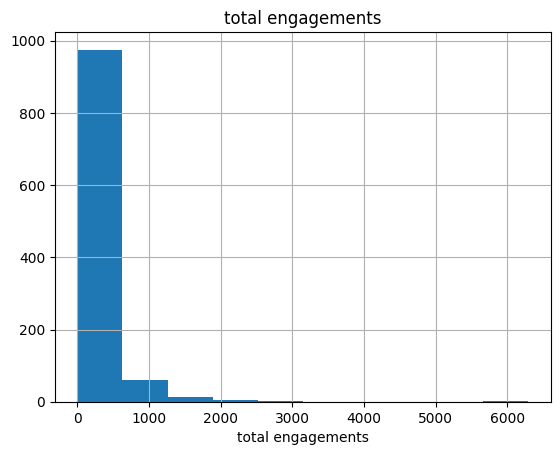

count    1054.000000
mean       34.914611
std        61.291577
min         0.000000
5%          0.000000
15%         2.000000
35%         7.000000
50%        13.500000
65%        26.000000
80%        49.400000
90%        83.700000
95%       144.700000
99%       299.820000
max       589.000000
Name: conversion, dtype: float64


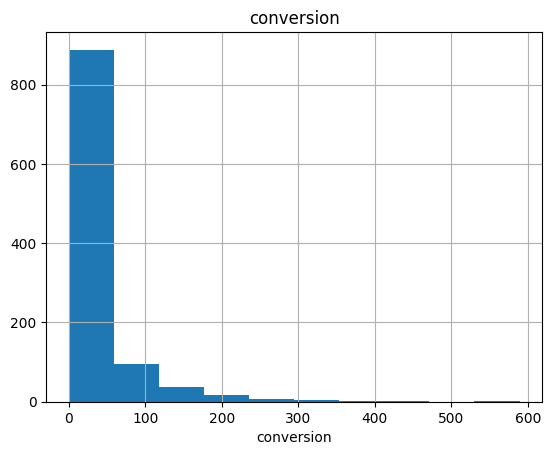

count    1054.000000
mean        0.777989
std         1.899180
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%         1.000000
90%         2.000000
95%         4.000000
99%        10.000000
max        10.000000
Name: number of faces, dtype: float64


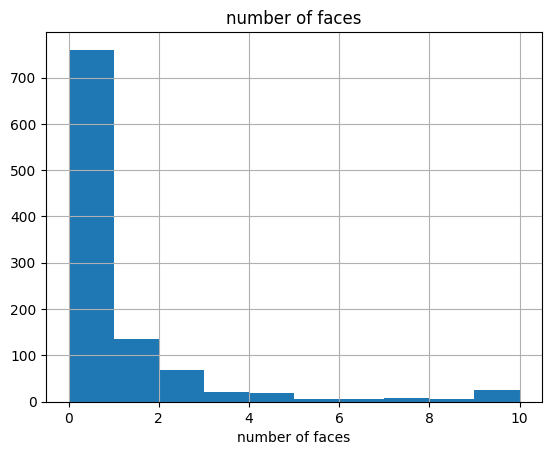

count    1054.000000
mean        0.644928
std         1.900660
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%         0.229155
90%         2.145328
95%         4.223635
99%         9.482738
max        26.340476
Name: face area percentage %, dtype: float64


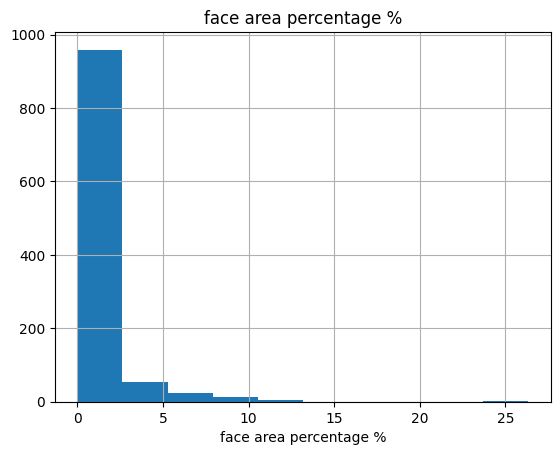

count    1054.000000
mean        1.817837
std         2.688484
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         1.000000
65%         2.000000
80%         3.000000
90%         5.000000
95%         9.350000
99%        10.000000
max        10.000000
Name: number of objects, dtype: float64


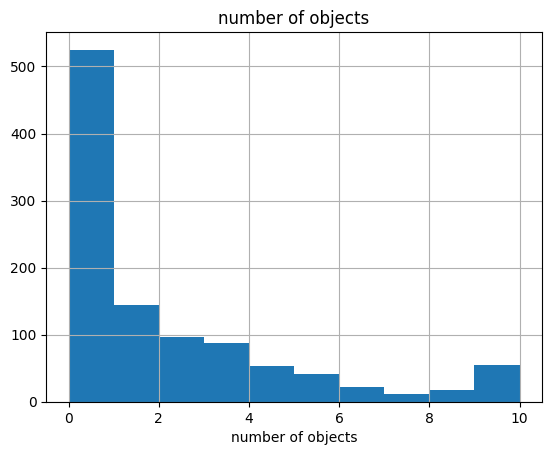

count    1054.000000
mean       12.695187
std        22.180729
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         5.051898
80%        25.345579
90%        44.839575
95%        62.710523
99%        94.719330
max        99.149411
Name: primary object area percentage %, dtype: float64


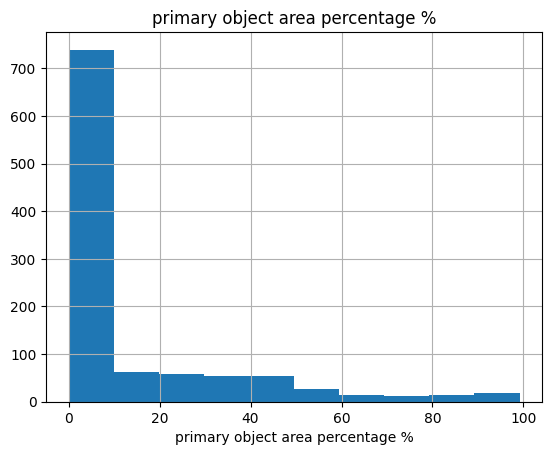

count    1054.000000
mean        4.379151
std        11.035399
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%         4.650115
90%        15.934515
95%        26.120448
99%        56.829328
max        92.711892
Name: secondary object area percentage %, dtype: float64


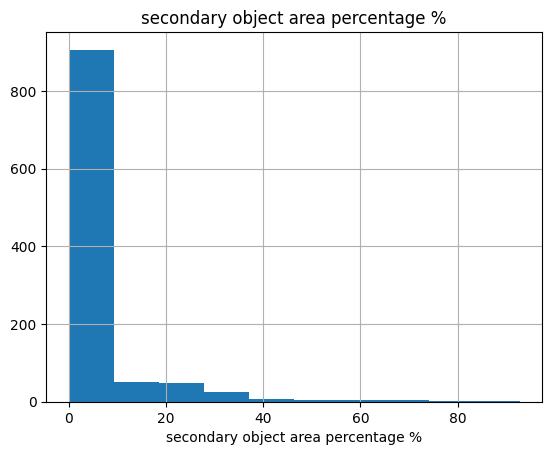

count    1054.000000
mean       68.045541
std       182.270990
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         9.000000
65%        65.450000
80%       121.000000
90%       182.000000
95%       245.350000
99%       391.000000
max      3669.000000
Name: text length, dtype: float64


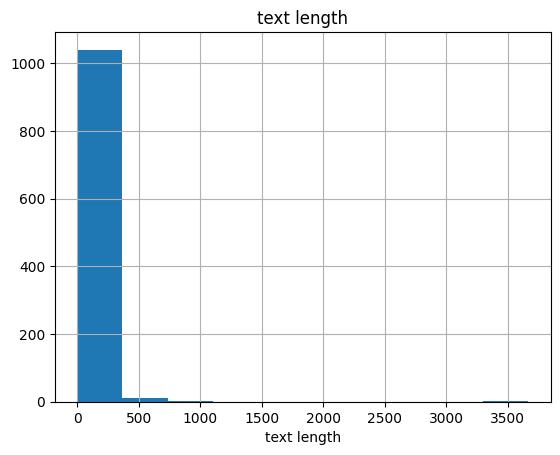

count    1054.000000
mean        1.214036
std         6.813438
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%         1.234124
90%         1.837974
95%         2.923077
99%        17.578727
max        75.250000
Name: logo 1 area percentage %, dtype: float64


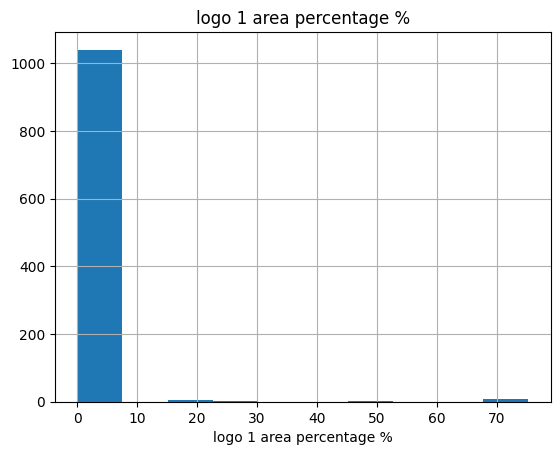

count    1054.000000
mean        0.117452
std         1.089433
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         4.033281
max        30.739978
Name: logo 2 area percentage %, dtype: float64


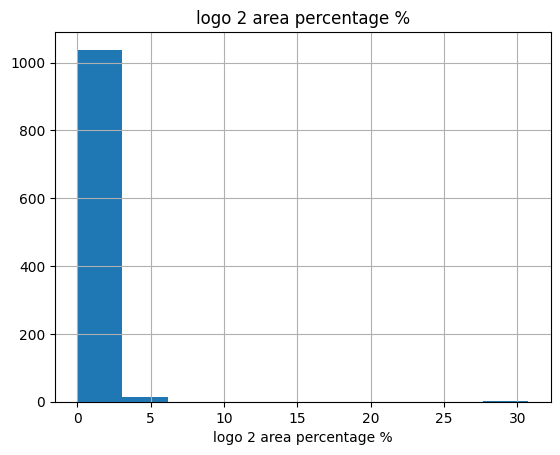

count    1054.000000
mean        0.861480
std         1.910578
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%         1.000000
90%         3.000000
95%         5.000000
99%        10.000000
max        10.000000
Name: number of persons, dtype: float64


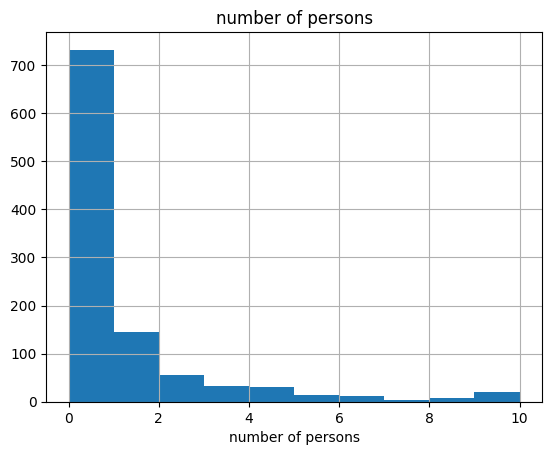

count    1054.000000
mean       13.327576
std        25.736842
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.000000
65%         0.000000
80%        29.621479
90%        51.739108
95%        70.878676
99%       104.262408
max       161.275964
Name: person area, dtype: float64


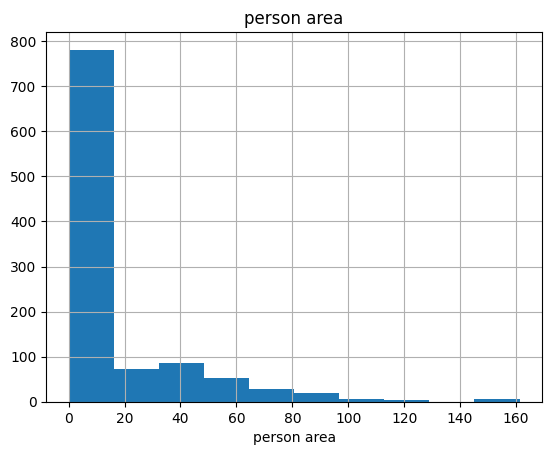

count    1054.000000
mean        7.204507
std        19.542672
min         0.000000
5%          0.000000
15%         0.000000
35%         0.000000
50%         0.475000
65%         6.100000
80%        11.780000
90%        19.640000
95%        25.735000
99%        60.600000
max       366.900000
Name: text area %, dtype: float64


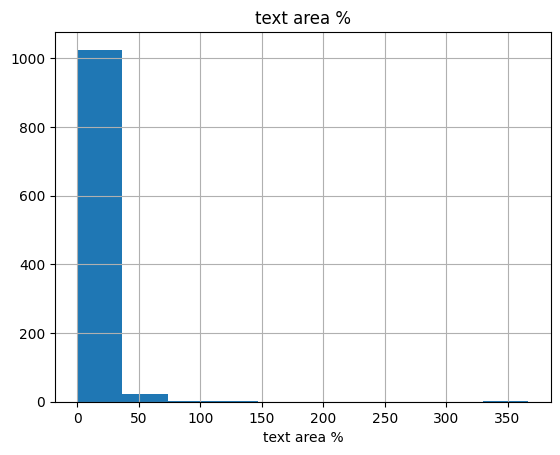

In [278]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [279]:
X_train, X_test= train_test_split(df, test_size=0.20, random_state=42)
print(X_test.shape)
print(X_train.shape)

(211, 57)
(843, 57)


In [280]:

X_train.isnull().sum()

date                                    0
company name                            0
spend                                   0
impressions                             0
likecount                               0
commentcount                            0
repostcount                             0
total engagements                       0
conversion                              0
action                                  0
type                                    0
posturl                                 0
postcontent                             0
profileurl                              0
videourl                              663
sharedposturl                         647
created_at                              0
size                                    0
url                                    62
number of faces                         0
face emotion                          598
face position                         598
face area percentage %                  0
objects                           

In [281]:
X_train.groupby('type')['spend'].mean()

type
Article                    222.631613
Document                   578.991500
Image                      253.976756
Poll                        31.012857
Text                        51.446667
Video (External Source)    104.909200
Video (LinkedIn Source)    218.163871
Name: spend, dtype: float64

In [282]:

X_test.groupby('type')['spend'].mean()

type
Article                    244.845556
Document                    59.936000
Image                       44.353214
Poll                        20.778000
Video (External Source)     13.058333
Video (LinkedIn Source)    154.330213
Name: spend, dtype: float64

In [283]:
X_test['spend'].fillna(X_test.groupby('type')['spend'].transform('mean'), inplace=True)

In [284]:
print(X_train.duplicated().sum())
print(X_test.duplicated().sum())

0
0


(869, 57)
(813, 57)


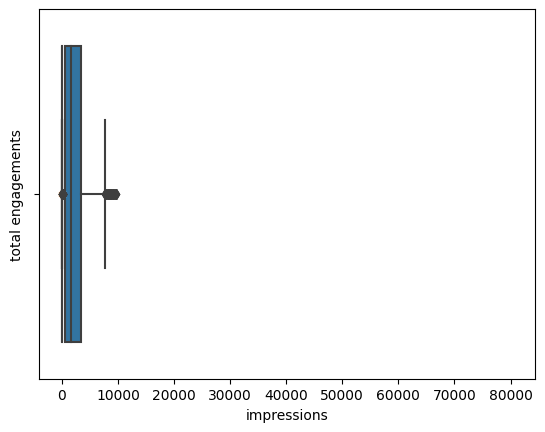

In [335]:


def remove_outlier(outlier,df):
    Q1 = df[outlier].quantile(0)
    Q3 = df[outlier].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR


    outliers_mask = (df[outlier] < lower) | (df[outlier] > upper)
    df = df[~outliers_mask]
    print(df.shape)
    sns.boxplot(data=df, x=outlier)
    return df
df= remove_outlier('spend',df)
df = remove_outlier('impressions',df)

<Axes: xlabel='spend', ylabel='total engagements'>

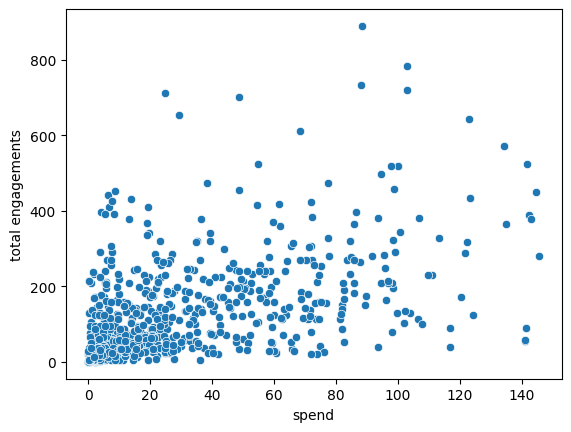

In [337]:
sns.scatterplot(x='spend', y='total engagements', data=df)


<Axes: xlabel='impressions', ylabel='total engagements'>

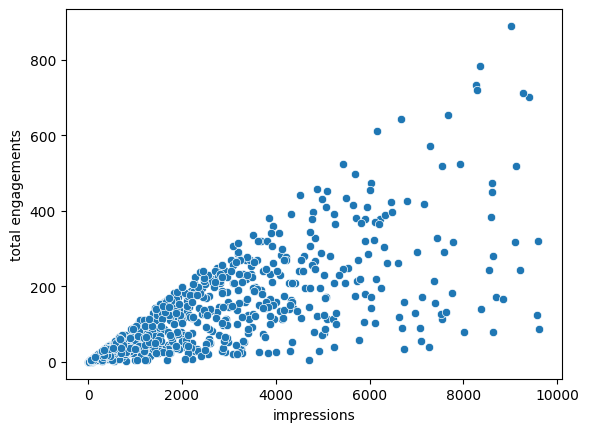

In [336]:
sns.scatterplot(x='impressions', y='total engagements', data=df)

In [338]:
pic_df = df[df['type']=='Image']
print(pic_df.shape)
pic_df.head()

(466, 57)


,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
1,2023-09-01,schneider-electric,1.80,3880,224,1,9,234,0,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,"When challenges arise, Schneider Electric Exch...",https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x420,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Building,1,Building,center,57.181154,NaN,NaN,0.000000,Life Is On Schneider|Electric|controlsee,37,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,0.714286,NaN,NaN,0.0,0,small,0.000000,NaN,NaN,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
8,2023-09-04,vertiv,7.68,1173,61,0,3,64,8,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,Revolutionize your #datacenter with Vertiv's p...,https://www.linkedin.com/company/vertiv/,NaN,NaN,2023-09-13 9:50:47,800x418,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Home appliance,1,Home appliance,center-right,24.398146,NaN,NaN,0.000000,VERTIV|Empowering Growth|Vertiv's Modular Data...,79,silver,NaN,Vertiv Co,Vertiv Co,top-left,1.442584,NaN,NaN,0.0,0,small,0.000000,Modern,Informative,Friendly,Positive,7.90,> 40%,Offerings,English,0,0,1,> 60
9,2023-09-06,vertiv,8.49,936,48,0,4,52,5,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,Say goodbye to conventional setups and embrace...,https://www.linkedin.com/company/vertiv/,NaN,NaN,2023-09-13 9:50:47,800x418,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Home appliance,1,Home appliance,center-right,24.398146,NaN,NaN,0.000000,VERTIV|Empowering Growth|Vertiv's Modular Data...,79,silver,NaN,Vertiv Co,Vertiv Co,top-left,1.442584,NaN,NaN,0.0,0,small,0.000000,Modern,Informative,Friendly,Positive,7.90,> 40%,Offerings,English,0,0,1,> 60
10,2023-09-04,vertiv,24.89,1312,38,0,0,38,9,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,Vertiv's STEM Day at http://ms.spr.ly/60449uyl...,https://www.linkedin.com/company/vertiv/,NaN,NaN,2023-09-13 9:50:47,800x800,https://rocketium.com/images/cran/prod/assets/...,10,Joy,center-right,0.225625,"Person, Person, Person, Person, Person, Person...",10,Person,center,5.171702,Person,center-right,4.520756,VERTIV|SH|Official Data Center Equipment|Provi...,172,black,NaN,Vertiv Co,Vertiv Co,top-left,2.020625,NaN,NaN,0.0,10,medium,28.460893,NaN,NaN,NaN,NaN,17.20,> 40%,Offerings,English,5 or more,5 or more,5 or more,> 60
11,2023-09-04,schneider-electric,8.21,342,26,0,4,30,6,Post,Image,https://www.linkedin.com/feed/update/urn:li:ac...,Are you ready to tap into the future of energy...,https://www.linkedin.com/company/schneider-ele...,NaN,NaN,2023-09-13 9:46:04,800x476,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,Light bulb,1,Light bulb,center-right,5.717873,NaN,NaN,0.000000,How will|energy drive|economies and|sustain so...,82,darkslategray,NaN,Schneider Electric,Schneider Electric,bottom-left,1.930935,NaN,NaN,0.0,0,small,0.000000,Modern,Informative,Friendly,Positive,8.20,> 40%,Digital Transformation,English,0,0,1,> 60


In [339]:
article_df = df[df['type']=='Article']
print(article_df.shape)
article_df.head()

(132, 57)


,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,type,posturl,postcontent,profileurl,videourl,sharedposturl,created_at,size,url,number of faces,face emotion,face position,face area percentage %,objects,number of objects,primary object,primary object position,primary object area percentage %,secondary object,secondary object position,secondary object area percentage %,text,text length,dominant colour,cta,logos,logo 1 name,logo 1 position,logo 1 area percentage %,logo 2 name,logo 2 position,logo 2 area percentage %,number of persons,person area %,person area,style,tone,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
7,2023-09-04,vertiv,7.47,330,12,0,3,15,2,Post,Article,https://www.linkedin.com/feed/update/urn:li:ac...,Need room to grow? 📈 Future-proof rack #power ...,https://www.linkedin.com/company/vertiv/,NaN,http://ms.spr.ly/60419nyG1,2023-09-13 9:52:07,800x450,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,NaN,0,NaN,NaN,0.000000,NaN,NaN,0.000000,TM|Vertiv™ Geist™|Combination Outlet|C13/C19 r...,92,black,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,0.000000,Modern,Informative,Friendly,Positive,9.20,> 40%,Offerings,English,0,0,0,> 60
13,2023-09-11,vertiv,2.06,88,1,0,0,1,0,Post,Article,https://www.linkedin.com/feed/update/urn:li:ac...,Save space 📏 and time ⏳ with Vertiv™ Liebert® ...,https://www.linkedin.com/company/vertiv/,NaN,http://ms.spr.ly/60499bjvU,2023-09-13 9:50:47,800x600,https://rocketium.com/images/cran/prod/assets/...,2,Joy,top-right,0.151875,"Pants, Person, Pants, Person, Outerwear, Jeans...",7,Person,center-right,5.112794,Person,center-right,5.060403,all|I,3,black,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,2,medium,10.173197,NaN,NaN,NaN,NaN,0.15,> 40%,Offerings,English,2 to 4,2 to 4,5 or more,< 20
14,2023-09-07,vertiv,2.20,145,8,0,1,9,0,Post,Article,https://www.linkedin.com/feed/update/urn:li:ac...,"Today, 9 a.m. EST, unlock insights into reliab...",https://www.linkedin.com/company/vertiv/,NaN,http://ms.spr.ly/60459nPkt,2023-09-13 9:50:47,800x419,https://rocketium.com/images/cran/prod/assets/...,4,Joy,center-left,0.935561,"Person, Person, Person, Person, Suit",5,Person,center-left,4.857573,Person,center,4.410758,3|DCD > Back-up & Generation|New episode Panel...,220,black,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,4,medium,18.333088,NaN,NaN,NaN,NaN,22.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,> 60
15,2023-09-01,vertiv,2.74,306,14,0,0,14,2,Post,Article,https://www.linkedin.com/feed/update/urn:li:ac...,"⏰ Save the date: Sept. 7, 9 am EST! 🗓️ Discove...",https://www.linkedin.com/company/vertiv/,NaN,http://ms.spr.ly/60479nP11,2023-09-13 9:52:07,800x419,https://rocketium.com/images/cran/prod/assets/...,4,Joy,center-left,0.935561,"Person, Person, Person, Person, Suit",5,Person,center-left,4.857573,Person,center,4.410758,3|DCD > Back-up & Generation|New episode Panel...,220,black,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,4,medium,18.333088,NaN,NaN,NaN,NaN,22.00,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,> 60
20,2023-09-01,rockwell-automation,141.44,6686,82,0,9,91,29,Post,Article,https://www.linkedin.com/feed/update/urn:li:ac...,According to the Consumer-Packaged Goods (CPG)...,https://www.linkedin.com/company/rockwell-auto...,NaN,https://rok.auto/3YZNB2c,2023-09-13 9:56:37,800x533,https://rocketium.com/images/cran/prod/assets/...,0,NaN,NaN,0.000000,"Food, Food, Food, Food",4,Food,bottom-right,2.087797,Food,center-right,1.717295,1117,3,darkgray,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0,small,0.000000,NaN,NaN,NaN,NaN,0.15,> 40%,Digital Transformation,English,0,0,2 to 4,< 20


In [285]:
def report(df, col_name):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(14,4)
    fig.suptitle(col_name, fontsize=14)
    sns.histplot(data=df, x=col_name, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=col_name, ax=ax[1])
    plt.show()

    print(df[col_name].describe())
    print(f'Skewness  {df[col_name].skew()}')

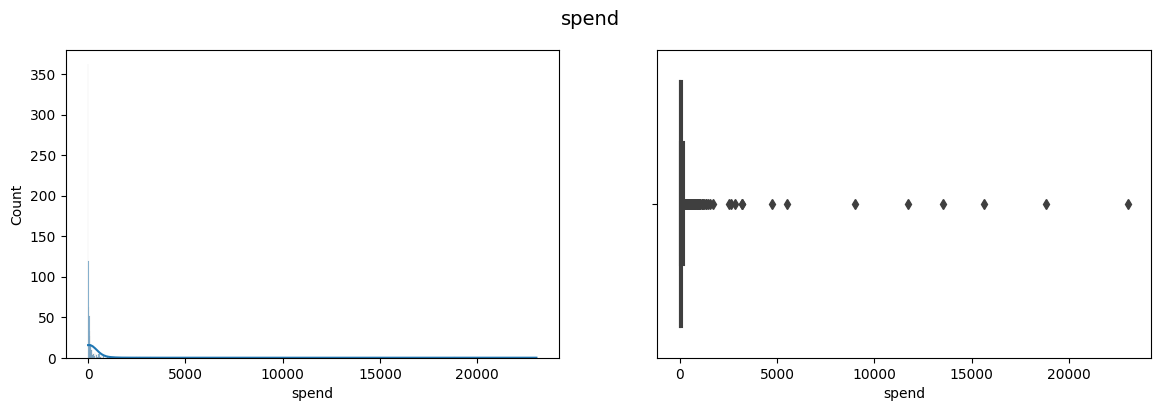

count      843.000000
mean       241.029632
std       1387.960092
min          0.000000
25%          6.975000
50%         25.040000
75%         94.505000
max      23039.110000
Name: spend, dtype: float64
Skewness  11.913219709966308


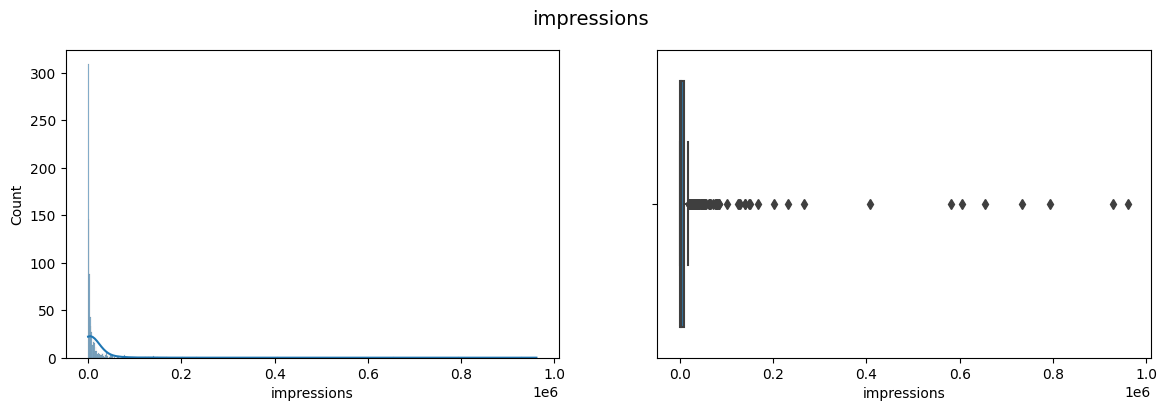

count       843.000000
mean      16432.727165
std       73595.223256
min           0.000000
25%         839.500000
50%        2561.000000
75%        7772.500000
max      961453.000000
Name: impressions, dtype: float64
Skewness  9.552470052748477


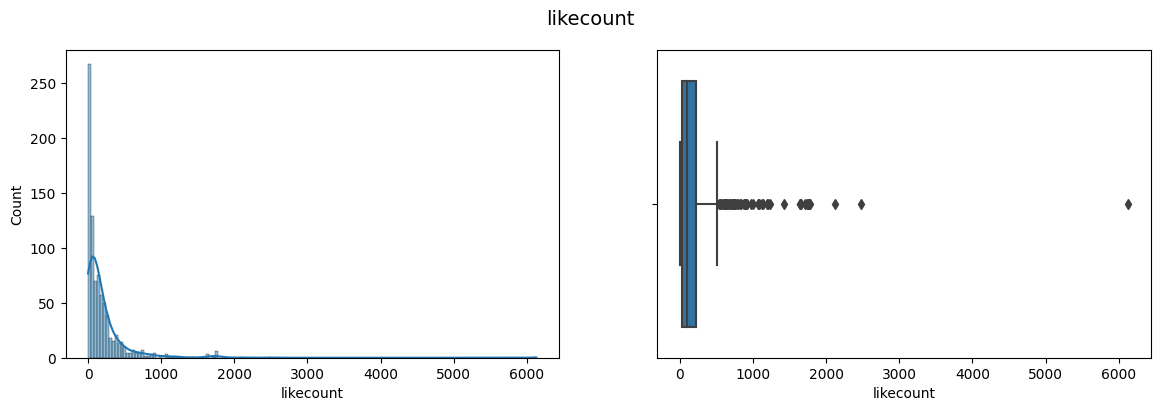

count     843.000000
mean      198.285884
std       352.012669
min         0.000000
25%        33.000000
50%        96.000000
75%       224.500000
max      6130.000000
Name: likecount, dtype: float64
Skewness  7.585130240809857


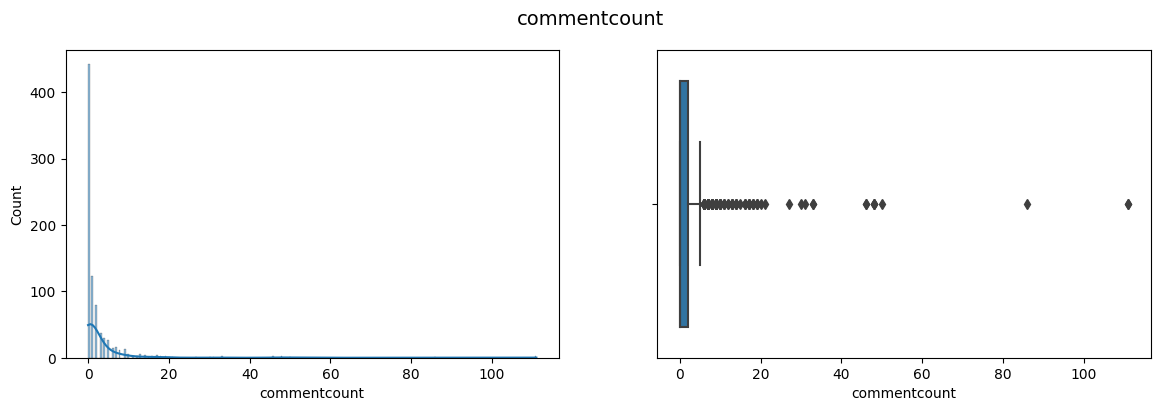

count    843.000000
mean       2.754448
std        8.226324
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      111.000000
Name: commentcount, dtype: float64
Skewness  8.210758130748218


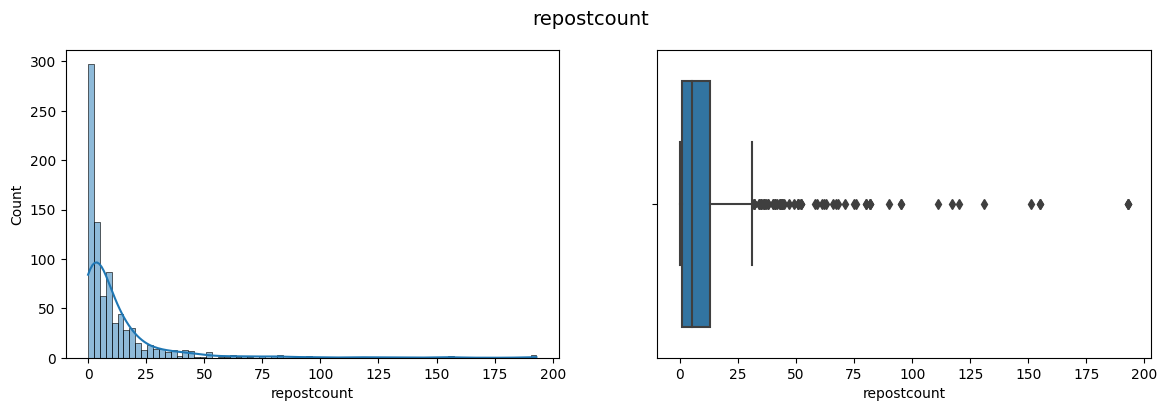

count    843.000000
mean      11.868327
std       21.237722
min        0.000000
25%        1.000000
50%        5.000000
75%       13.000000
max      193.000000
Name: repostcount, dtype: float64
Skewness  4.654313898770261


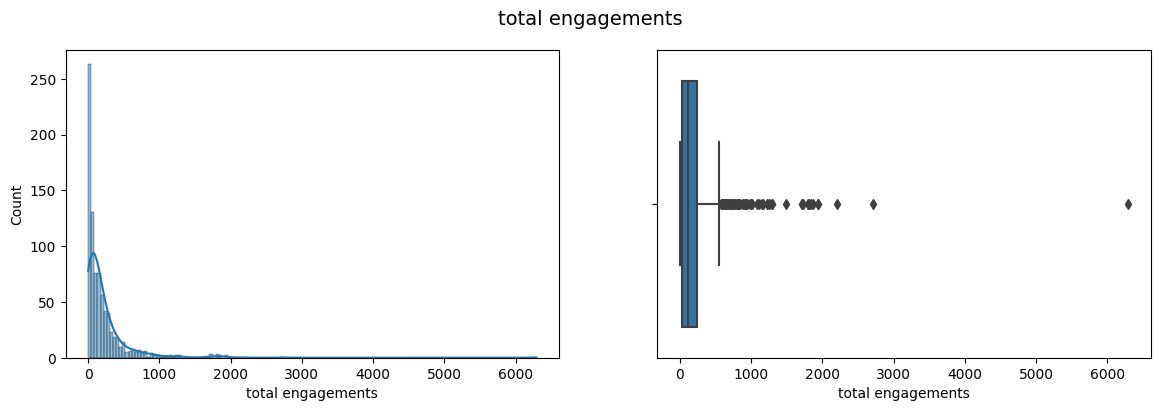

count     843.000000
mean      212.908660
std       369.918493
min         0.000000
25%        35.000000
50%       107.000000
75%       242.000000
max      6291.000000
Name: total engagements, dtype: float64
Skewness  7.223391177751738


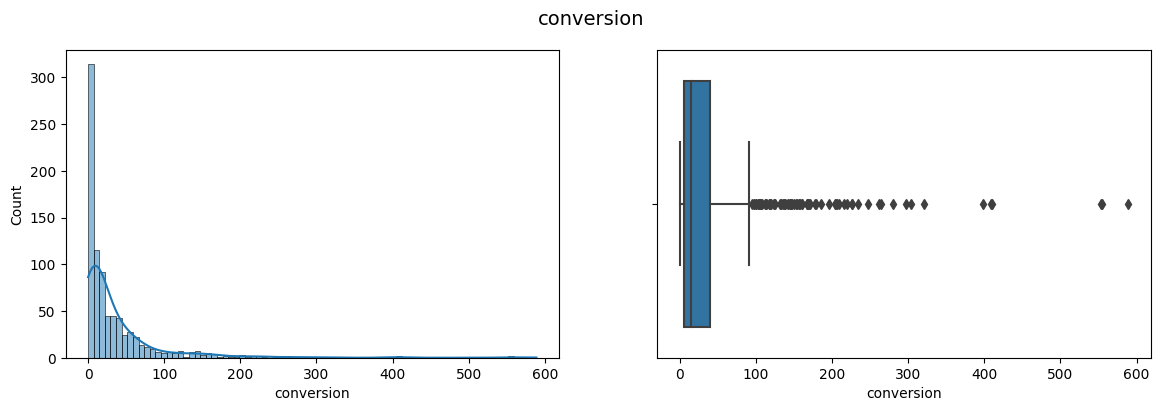

count    843.000000
mean      35.079478
std       60.665741
min        0.000000
25%        5.000000
50%       14.000000
75%       40.000000
max      589.000000
Name: conversion, dtype: float64
Skewness  4.384234278693409


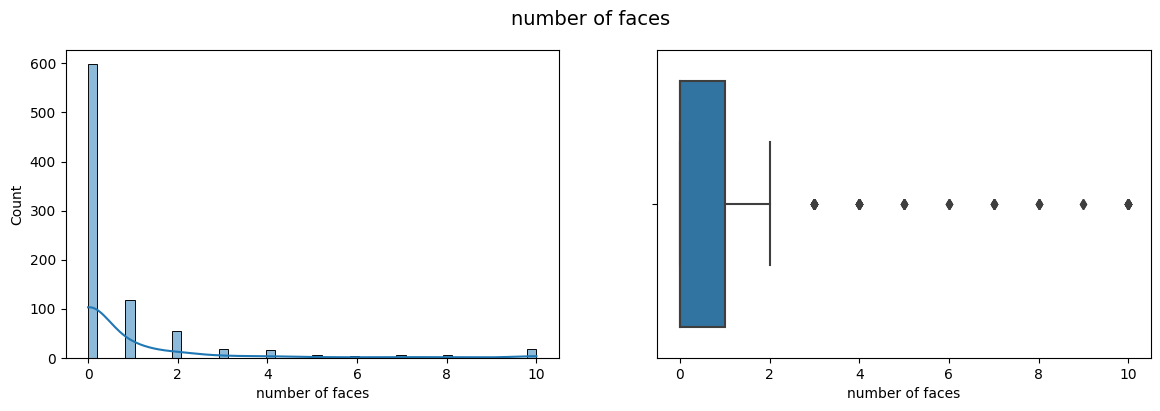

count    843.000000
mean       0.798339
std        1.908761
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: number of faces, dtype: float64
Skewness  3.4080835764800503


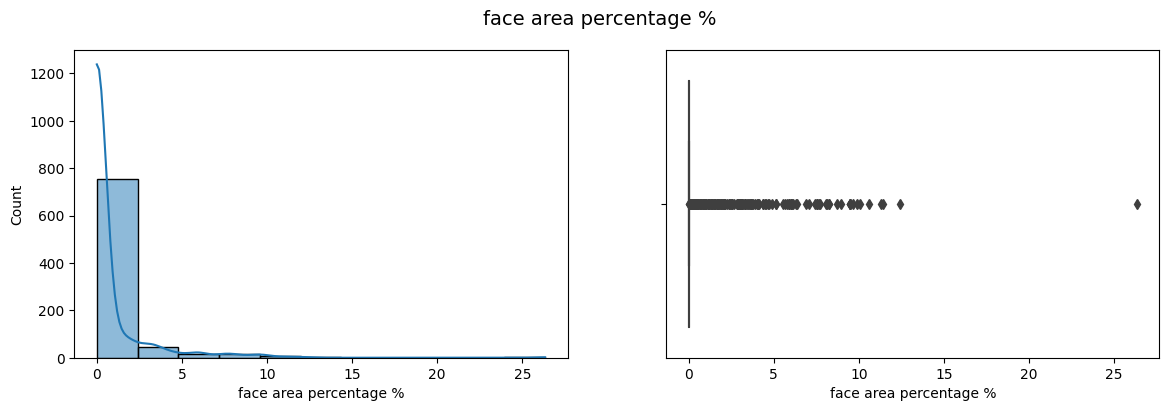

count    843.000000
mean       0.715120
std        2.044920
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       26.340476
Name: face area percentage %, dtype: float64
Skewness  4.85195665304986


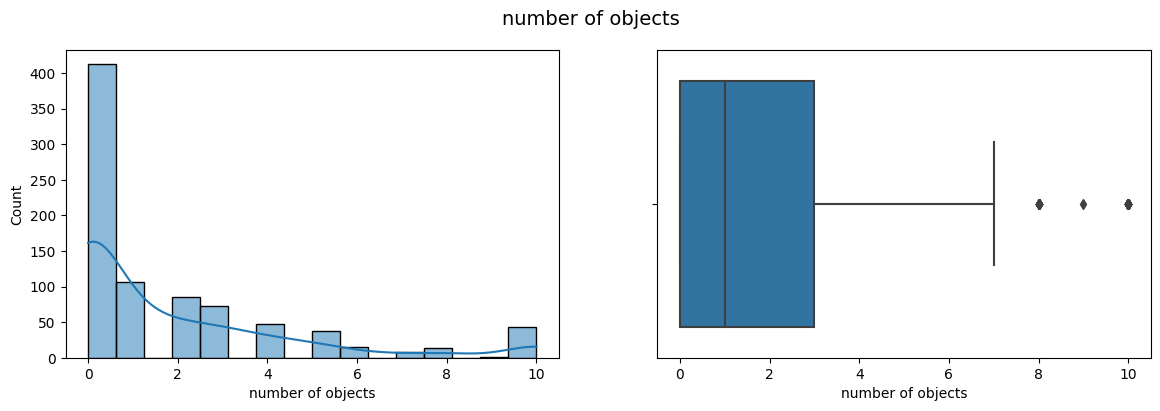

count    843.000000
mean       1.862396
std        2.687624
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       10.000000
Name: number of objects, dtype: float64
Skewness  1.7114221026068173


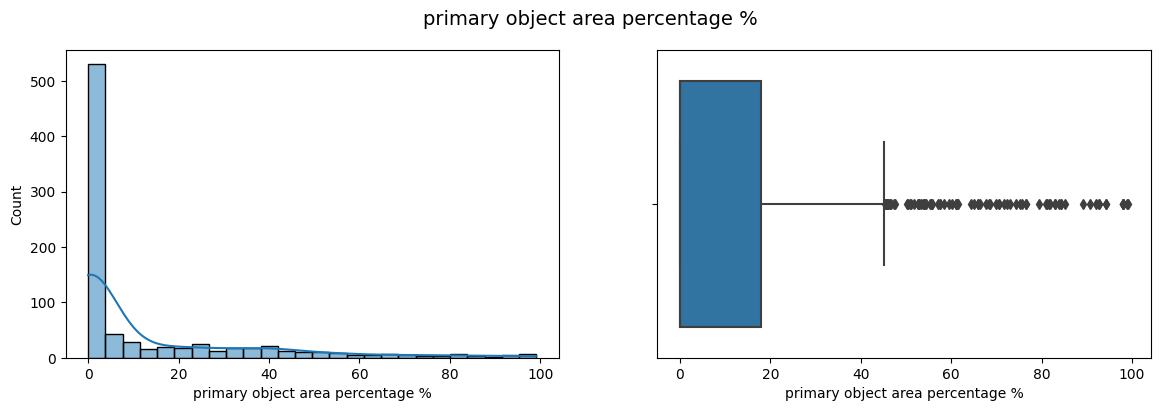

count    843.000000
mean      12.683556
std       22.063348
min        0.000000
25%        0.000000
50%        0.000000
75%       18.037849
max       99.149411
Name: primary object area percentage %, dtype: float64
Skewness  1.9618768776067566


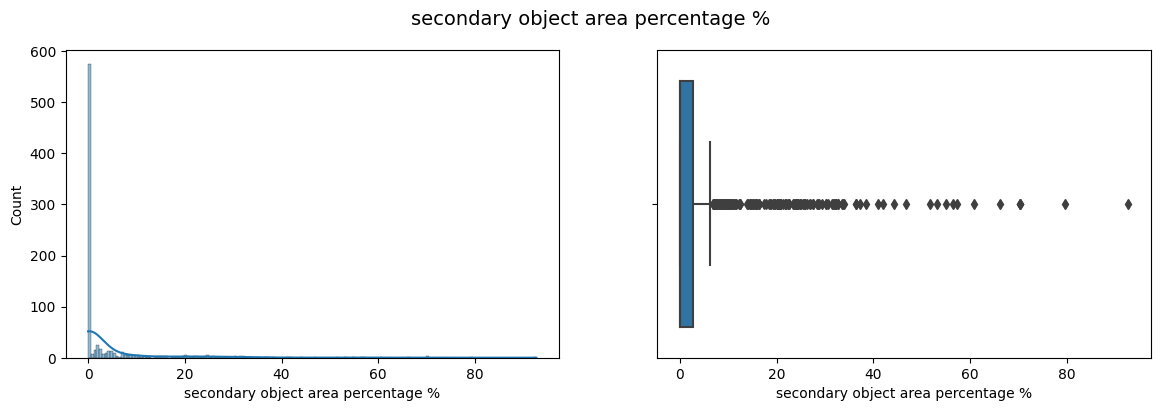

count    843.000000
mean       4.455636
std       10.868563
min        0.000000
25%        0.000000
50%        0.000000
75%        2.687371
max       92.711892
Name: secondary object area percentage %, dtype: float64
Skewness  3.719231102939604


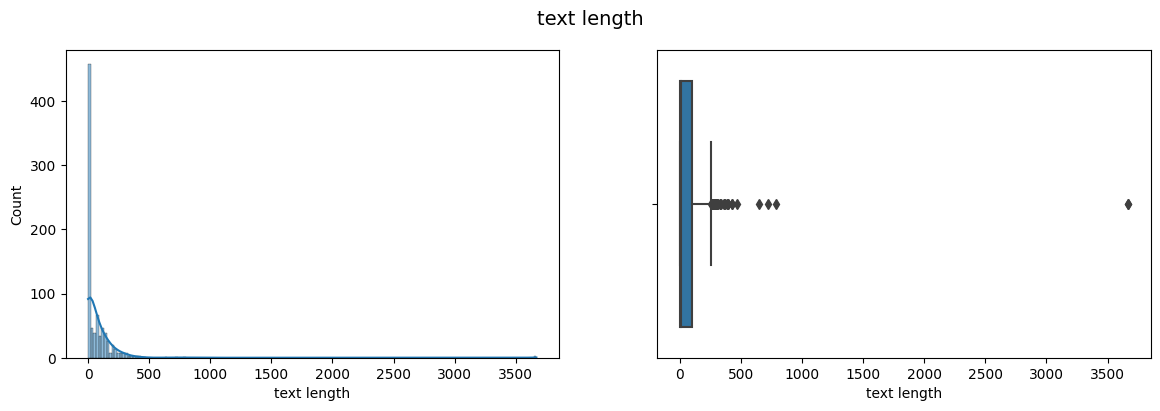

count     843.000000
mean       69.650059
std       198.609973
min         0.000000
25%         0.000000
50%         7.000000
75%       102.500000
max      3669.000000
Name: text length, dtype: float64
Skewness  14.398517504219019


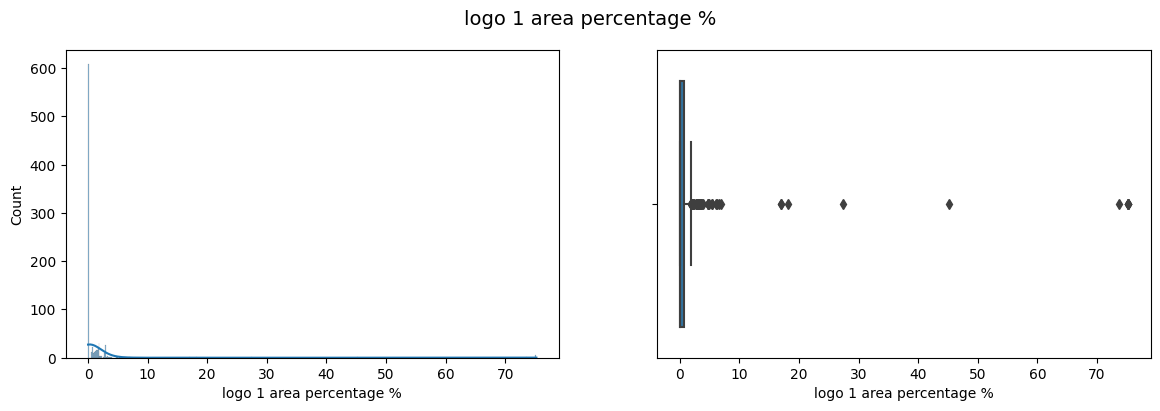

count    843.000000
mean       1.182156
std        6.659736
min        0.000000
25%        0.000000
50%        0.000000
75%        0.753889
max       75.250000
Name: logo 1 area percentage %, dtype: float64
Skewness  10.190494171234011


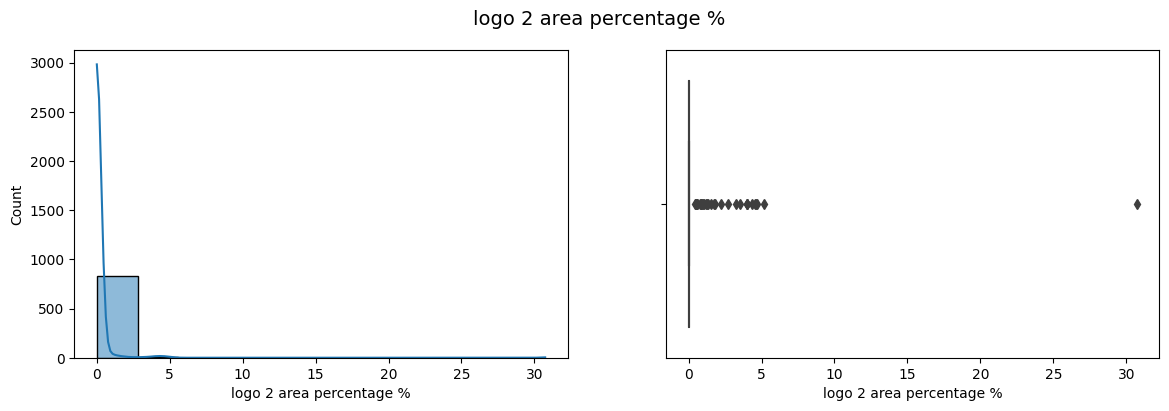

count    843.000000
mean       0.114304
std        1.167801
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       30.739978
Name: logo 2 area percentage %, dtype: float64
Skewness  22.053095975918133


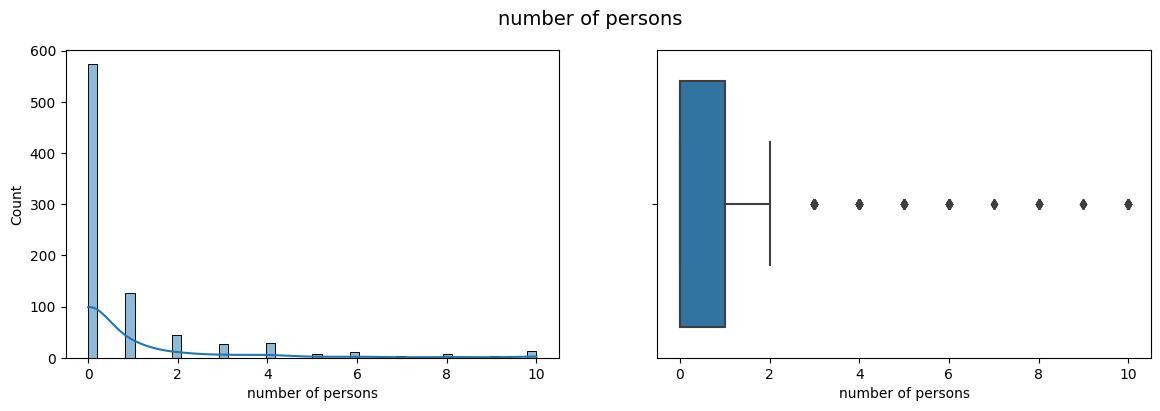

count    843.000000
mean       0.884935
std        1.906932
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: number of persons, dtype: float64
Skewness  2.9946134789714813


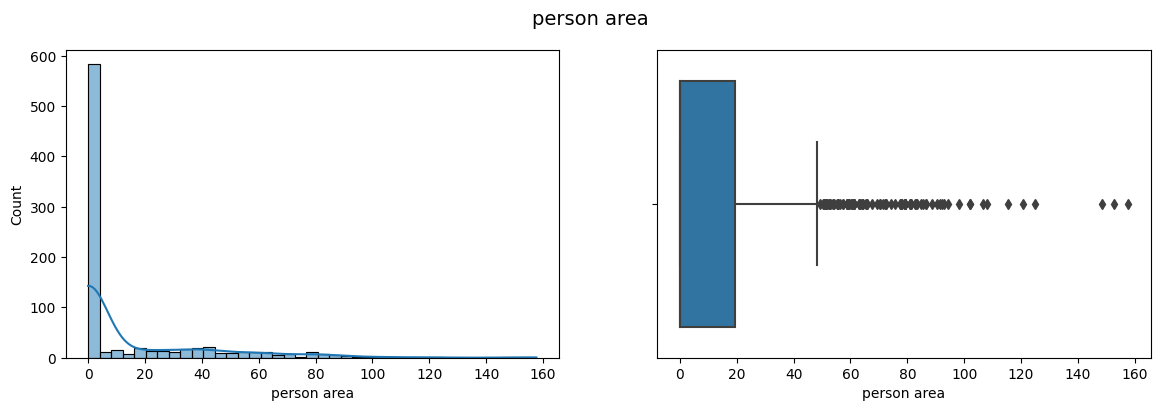

count    843.000000
mean      13.904537
std       25.903360
min        0.000000
25%        0.000000
50%        0.000000
75%       19.521196
max      157.684126
Name: person area, dtype: float64
Skewness  2.1226412823985923


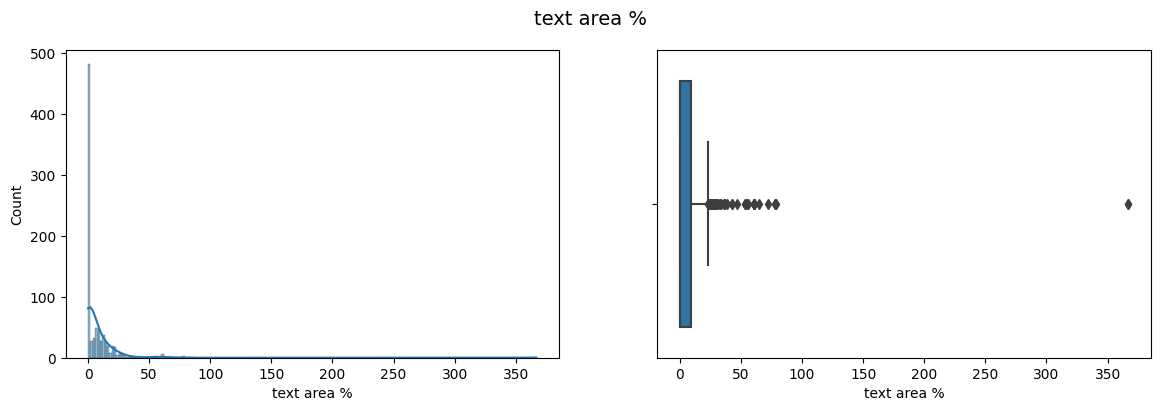

count    843.000000
mean       7.315006
std       20.859957
min        0.000000
25%        0.000000
50%        0.400000
75%        9.150000
max      366.900000
Name: text area %, dtype: float64
Skewness  12.644869434379844


In [286]:

for col in num_cols:
    if not col == 'ID':
      report(X_train, col)

In [287]:

def grab_outliers(dataframe, col_name):
  df_col_name = dataframe[col_name]

  # to define upper and lower outlier boundaries by third and first quartiles
  Q1 = df_col_name.quantile(0.25)
  Q3 = df_col_name.quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  outliers = (df_col_name < lower_bound) | (df_col_name > upper_bound)
  outliers_index = df_col_name[outliers].index

  print(f"{col_name} variable\n"
        f"Outliers boundaries: {lower_bound}, {upper_bound}\n"
        f"Number of outliers : {len(outliers_index)}")

  return col_name, lower_bound, upper_bound, outliers_index

In [288]:
def capping_outliers(df, col_name, outliers_index, bound):
  df[col_name][outliers_index] = bound
  return df


In [289]:

num_cols

['spend',
 'impressions',
 'likecount',
 'commentcount',
 'repostcount',
 'total engagements',
 'conversion',
 'number of faces',
 'face area percentage %',
 'number of objects',
 'primary object area percentage %',
 'secondary object area percentage %',
 'text length',
 'logo 1 area percentage %',
 'logo 2 area percentage %',
 'number of persons',
 'person area',
 'text area %']

<ipython-input-290-a5a7f5764d19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


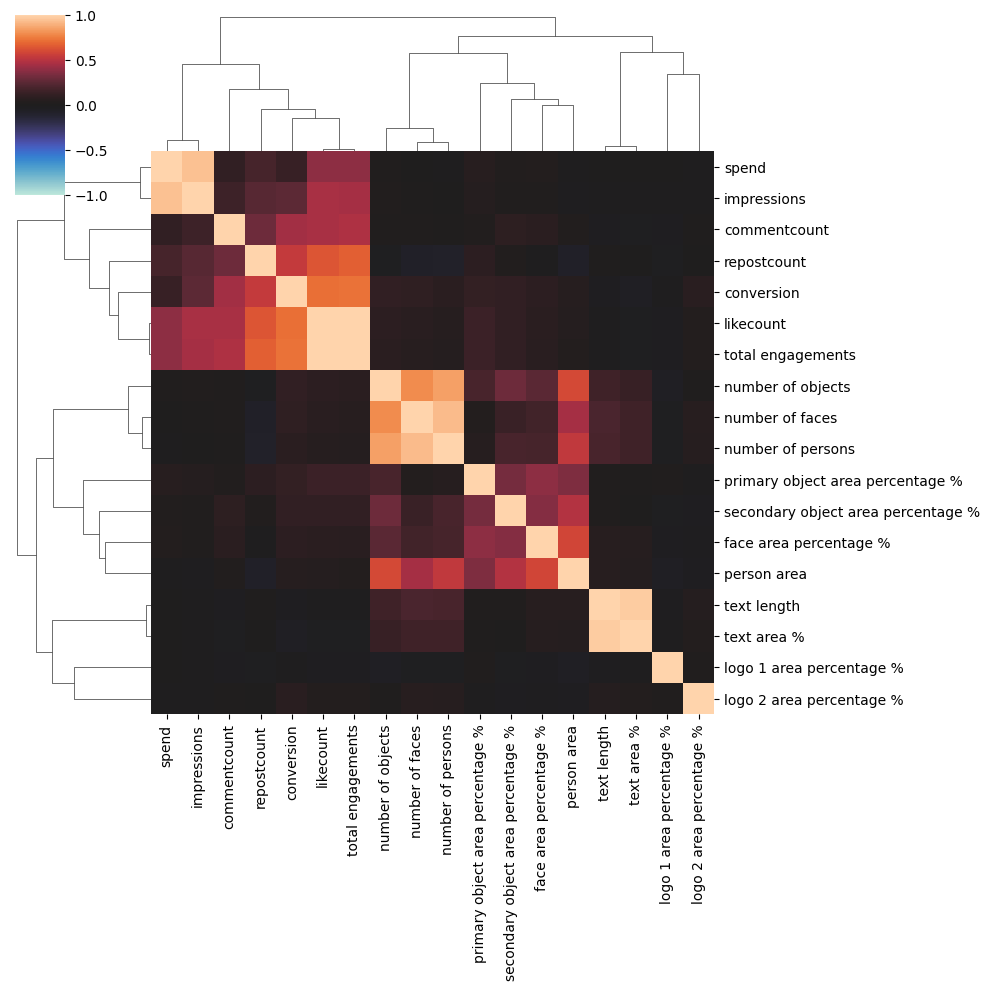

In [290]:
sns.clustermap(
        df.corr(),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete"
    );

In [291]:
def cat_val_graph(df, col_name):
  plt.figure(figsize = (14, 12))

  sns.countplot(x = df[col_name], palette = 'rocket_r')

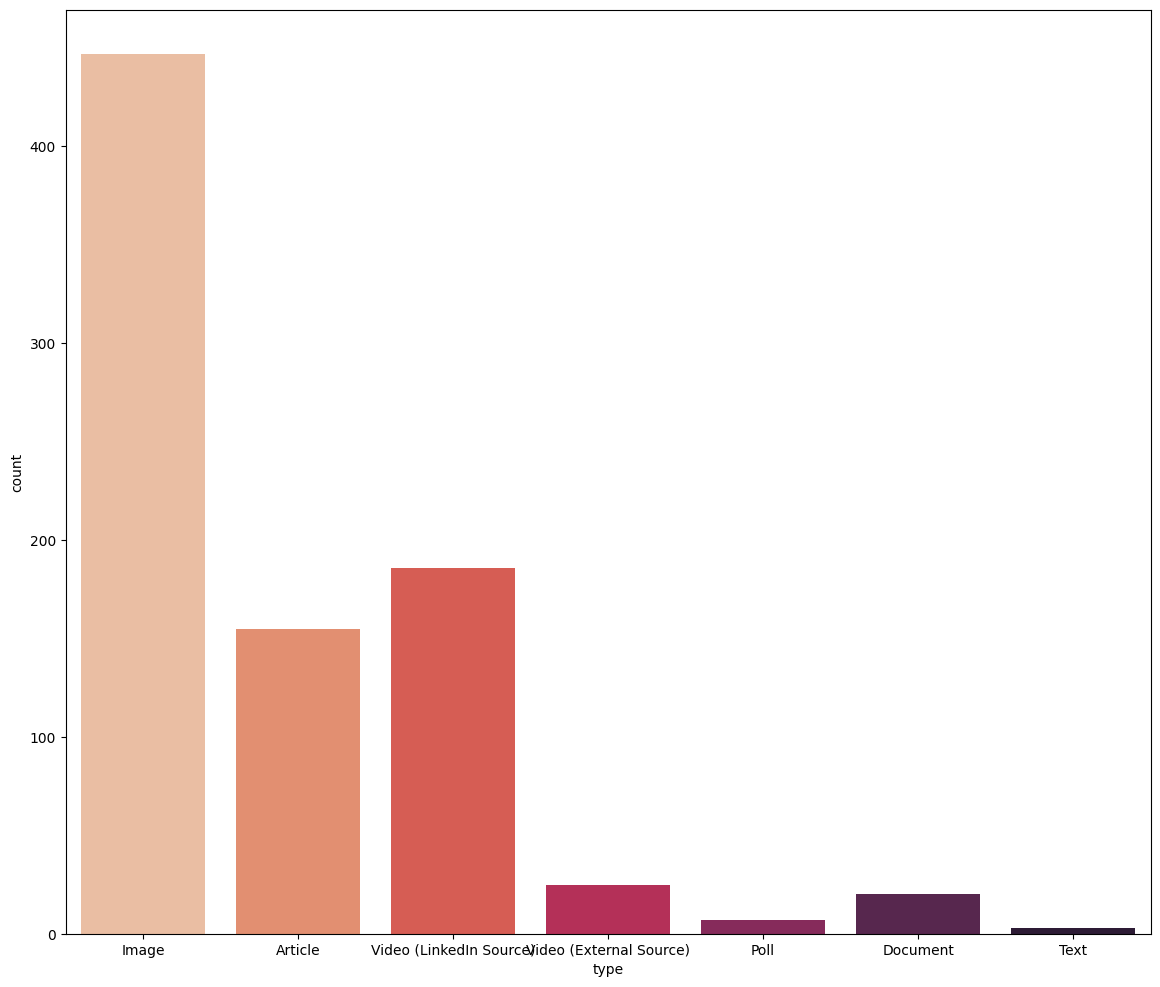

In [292]:

cat_val_graph(X_train, 'type')


In [312]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
b = df.loc[:,['spend','impressions']]
c = df['commentcount']

In [316]:
# Define pre-processing steps
X_train, X_test, y_train, y_test = train_test_split(b, c, test_size=0.2, random_state=42)
numeric_features = b.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error: 118.43557914691944
R-squared (R2 Score): -0.05015461316595249


In [317]:
df2 = pd.read_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Dataset with Predictions.csv")

In [318]:
newv = df2[['spend','impressions']]

# Use the trained pipeline for inference
newp = pipeline.predict(newv)

# Print or use the predictions as needed
df2['commentcount'] = newp
print(newp)

[1.60e-01 0.00e+00 0.00e+00 2.00e-02 3.80e-01 0.00e+00 6.00e-02 1.20e-01
 0.00e+00 0.00e+00 0.00e+00 1.00e-02 0.00e+00 0.00e+00 1.46e+00 3.30e-01
 0.00e+00 9.50e-01 7.40e-01 1.10e-01 0.00e+00 0.00e+00 6.00e-02 0.00e+00
 0.00e+00 0.00e+00 2.30e-01 0.00e+00 0.00e+00 4.40e-01 3.70e-01 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.70e-01 3.20e-01 1.00e-02 2.20e-01
 1.00e-02 0.00e+00 1.22e+01 1.18e+00 3.90e-01 0.00e+00 1.00e-02 9.00e-02
 1.00e-02 1.70e-01 0.00e+00 0.00e+00 1.97e+00 5.60e-01 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 2.30e-01 4.70e-01 4.70e-01 3.37e+00 7.40e-01 2.30e-01
 1.00e-02 2.00e-02 1.10e-01 2.03e+00 4.77e+00 3.35e+00 1.10e-01 0.00e+00
 7.10e-01 1.00e-01 0.00e+00 1.00e-01 3.00e-02 0.00e+00 1.00e-02 6.60e-01
 0.00e+00 2.40e-01 5.00e-02 2.00e-02 1.90e-01 0.00e+00 1.40e-01 5.30e-01
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.87e+01 0.00e+00 0.00e+00 0.00e+00
 3.00e-02 0.00e+00 1.00e-02 0.00e+00 1.20e-01 6.00e-01 5.30e-01 4.20e-01
 3.73e+00 4.50e-01 5.70e-01 0.00e+00 2.08e+00 5.40e

In [319]:
df2.to_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Dataset with Predictions.csv", index=False)

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
id = df.loc[:,['spend','impressions']]
kd = df['repostcount']

In [321]:
# Define pre-processing steps
X_train, X_test, y_train, y_test = train_test_split(id, kd, test_size=0.2, random_state=42)
numeric_features = id.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error: 141.74171516587677
R-squared (R2 Score): 0.2715981851024025


In [322]:
df2 = pd.read_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Dataset with Predictions.csv")

In [323]:
new_d = df2[['spend','impressions']]

# Use the trained pipeline for inference
new_predictio = pipeline.predict(new_d)

# Print or use the predictions as needed

df2['repostcount'] = new_predictio
print(new_predictio )

[1.590e+00 2.400e-01 2.050e+00 2.020e+00 8.280e+00 1.480e+00 1.300e+00
 1.650e+00 8.000e-01 3.400e-01 0.000e+00 3.520e+00 1.040e+00 8.100e-01
 3.270e+00 8.630e+00 8.000e-02 6.330e+00 2.570e+00 6.180e+00 7.500e-01
 5.900e-01 1.250e+00 8.000e-02 1.900e+00 9.000e-02 3.170e+00 2.300e-01
 2.390e+00 1.700e+00 4.880e+00 2.100e+00 2.700e-01 0.000e+00 0.000e+00
 8.000e-02 9.120e+00 2.660e+00 1.500e-01 3.890e+00 1.420e+00 8.000e-02
 3.643e+01 9.330e+00 1.860e+00 8.000e-02 6.100e-01 1.650e+00 2.000e-01
 2.880e+00 6.800e-01 5.200e-01 4.360e+00 4.990e+00 0.000e+00 1.200e+00
 8.800e-01 1.560e+00 5.200e-01 1.320e+00 4.630e+00 7.260e+00 3.430e+00
 1.170e+00 2.400e-01 1.530e+00 1.610e+00 1.156e+01 1.624e+01 1.824e+01
 1.200e+00 2.100e-01 6.660e+00 8.900e-01 0.000e+00 6.500e-01 1.310e+00
 1.030e+00 5.000e-01 7.790e+00 8.900e-01 3.080e+00 1.560e+00 9.100e-01
 7.290e+00 0.000e+00 3.070e+00 7.300e-01 3.000e-02 9.200e-01 0.000e+00
 1.970e+00 1.441e+01 1.570e+00 1.730e+00 1.490e+00 1.210e+00 2.300e-01
 1.850

In [324]:
df2.to_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Dataset with Predictions.csv", index=True)

In [325]:
o = df.loc[:,['spend','impressions']]
m = df['total engagements']

In [326]:
# Define pre-processing steps
X_train, X_test, y_train, y_test = train_test_split(o, m, test_size=0.2, random_state=42)
numeric_features = o.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error: 58726.38961895736
R-squared (R2 Score): 0.4290264604651186


In [327]:
new_da = df2[['spend','impressions']]

# Use the trained pipeline for inference
new_predictio = pipeline.predict(new_da)

# Print or use the predictions as needed

print(new_predictio)

df2['total engagement'] = new_predictio

[ 27.23   5.91  18.56  34.16  61.62  13.37  32.9   34.63  25.05   6.61
   1.13  64.62   8.89   9.38  92.07  99.66   1.47 116.97  61.76  72.13
   8.34  17.89   9.59   0.51   9.79   5.45  59.78   5.96  20.15  30.21
  62.57  17.89   2.45   4.18   1.82   0.76 130.08  43.73   4.89  42.39
  12.47   0.97 352.81 146.15  28.18   0.51  20.86  13.14   3.39  59.33
  10.28   9.31  86.43  63.31   1.35   9.79  15.33  16.49   7.01  44.58
  71.6  257.29  97.22  19.03   5.57  19.5   34.24 239.38 358.34 203.2
  17.33   4.22 102.05  35.62   2.37  28.83  16.01  17.84   6.92 129.15
  11.13  40.37  28.38  21.21  65.33   1.07  35.88  29.78   2.37   6.54
   1.06  25.64 215.92  30.33  10.41  31.96  14.9    9.24  23.84  10.03
  31.16  74.77 155.57  30.54 267.86  22.98  65.54   2.04  74.24  66.25
   7.97  25.52   9.22   4.6   85.09  17.     3.89   9.43  51.74   6.79
  78.72  42.05]


In [328]:
df2.to_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Dataset with Predictions.csv", index=True)

In [329]:
ip = df.loc[:,['spend','impressions']]
kp = df['conversion']

X_train, X_test, y_train, y_test = train_test_split(ip, kp, test_size=0.2, random_state=42)
numeric_features = ip.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error: 2929.5350450236974
R-squared (R2 Score): 0.2785627498256169


In [330]:
ne = df2[['spend','impressions']]

# Use the trained pipeline for inference
predictio = pipeline.predict(ne)

# Print or use the predictions as needed

print(predictio)

df2['total engagement'] = predictio

[3.0000e+00 1.0200e+00 3.6800e+00 4.8200e+00 8.0100e+00 1.0500e+00
 4.9700e+00 6.1800e+00 3.5100e+00 7.7000e-01 0.0000e+00 6.2900e+00
 1.2800e+00 2.2100e+00 1.3360e+01 1.8200e+01 7.0000e-02 2.2270e+01
 9.1000e+00 1.8150e+01 1.4900e+00 3.3500e+00 2.9200e+00 7.0000e-02
 2.9300e+00 1.3300e+00 3.8100e+00 7.7000e-01 2.5000e+00 2.5900e+00
 1.0870e+01 8.1000e-01 1.0000e-01 7.9000e-01 3.0000e-02 7.0000e-02
 1.6890e+01 7.7500e+00 9.1000e-01 8.7200e+00 4.0400e+00 7.0000e-02
 1.0391e+02 1.1900e+01 2.2600e+00 7.0000e-02 3.6100e+00 3.7500e+00
 3.5000e-01 5.1300e+00 1.8200e+00 7.8000e-01 1.3630e+01 8.5000e+00
 0.0000e+00 1.8700e+00 3.5700e+00 3.4100e+00 9.8000e-01 6.4100e+00
 5.8200e+00 3.6590e+01 1.0130e+01 4.4300e+00 6.9000e-01 3.5900e+00
 6.3900e+00 6.9800e+01 9.5050e+01 1.4370e+01 2.6400e+00 1.2700e+00
 9.5300e+00 6.9300e+00 9.0000e-02 5.2300e+00 3.8000e+00 4.0300e+00
 5.2000e-01 2.6900e+01 5.0000e-01 9.3200e+00 5.8300e+00 4.2900e+00
 8.2600e+00 0.0000e+00 2.8400e+00 4.0100e+00 5.0000e-02 8.8000

In [331]:
df2.to_csv("/content/drive/MyDrive/dataset/Rocketium AI_ML Internship Assignment - 2 - Dataset with Predictions.csv", index=True)

In [332]:
ii = df.loc[:,['spend','impressions']]
oo = df['likecount']

X_train, X_test, y_train, y_test = train_test_split(ii,oo, test_size=0.2, random_state=42)
numeric_features = ii.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2 Score): {r2}')

Mean Squared Error: 53720.631451658766
R-squared (R2 Score): 0.4289479329101743


In [333]:
ne = df2[['spend','impressions']]

# Use the trained pipeline for inference
predictio = pipeline.predict(ne)

# Print or use the predictions as needed

print(predictio)

[ 26.16   5.3   16.6   31.1   56.12  13.75  31.76  31.52  24.05   5.77
   1.11  61.32   7.94   9.13  90.12  83.39   1.45 109.29  57.69  68.25
   7.8   17.38   9.27   0.5    9.06   5.18  53.73   5.39  19.37  28.61
  58.26  16.1    2.38   4.12   1.85   0.75 118.46  38.77   4.57  38.35
  11.32   0.97 350.46 134.65  26.     0.5   18.61  11.66   3.38  58.43
   9.99   9.23  81.46  58.83   1.33   7.85  14.88  15.04   6.52  41.17
  67.32 252.33  97.1   18.37   5.62  17.34  30.99 227.94 330.15 181.43
  16.72   3.99 101.    34.74   2.49  27.6   15.52  16.83   6.48 120.33
  10.21  38.33  26.46  20.37  61.28   1.05  35.18  30.9    2.45   5.69
   1.06  23.7  191.69  29.19   8.4   30.49  13.7    9.24  22.51   7.84
  29.04  72.96 146.91  30.28 231.99  21.    61.11   2.05  70.81  61.74
   6.9   23.76   8.51   4.3   72.25  15.48   3.73   8.12  44.16   5.32
  75.9   40.22]
